# Exploratory Data Analysis


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Surname     891 non-null object
Title       891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
Surname     712 non-null object
Title       712 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


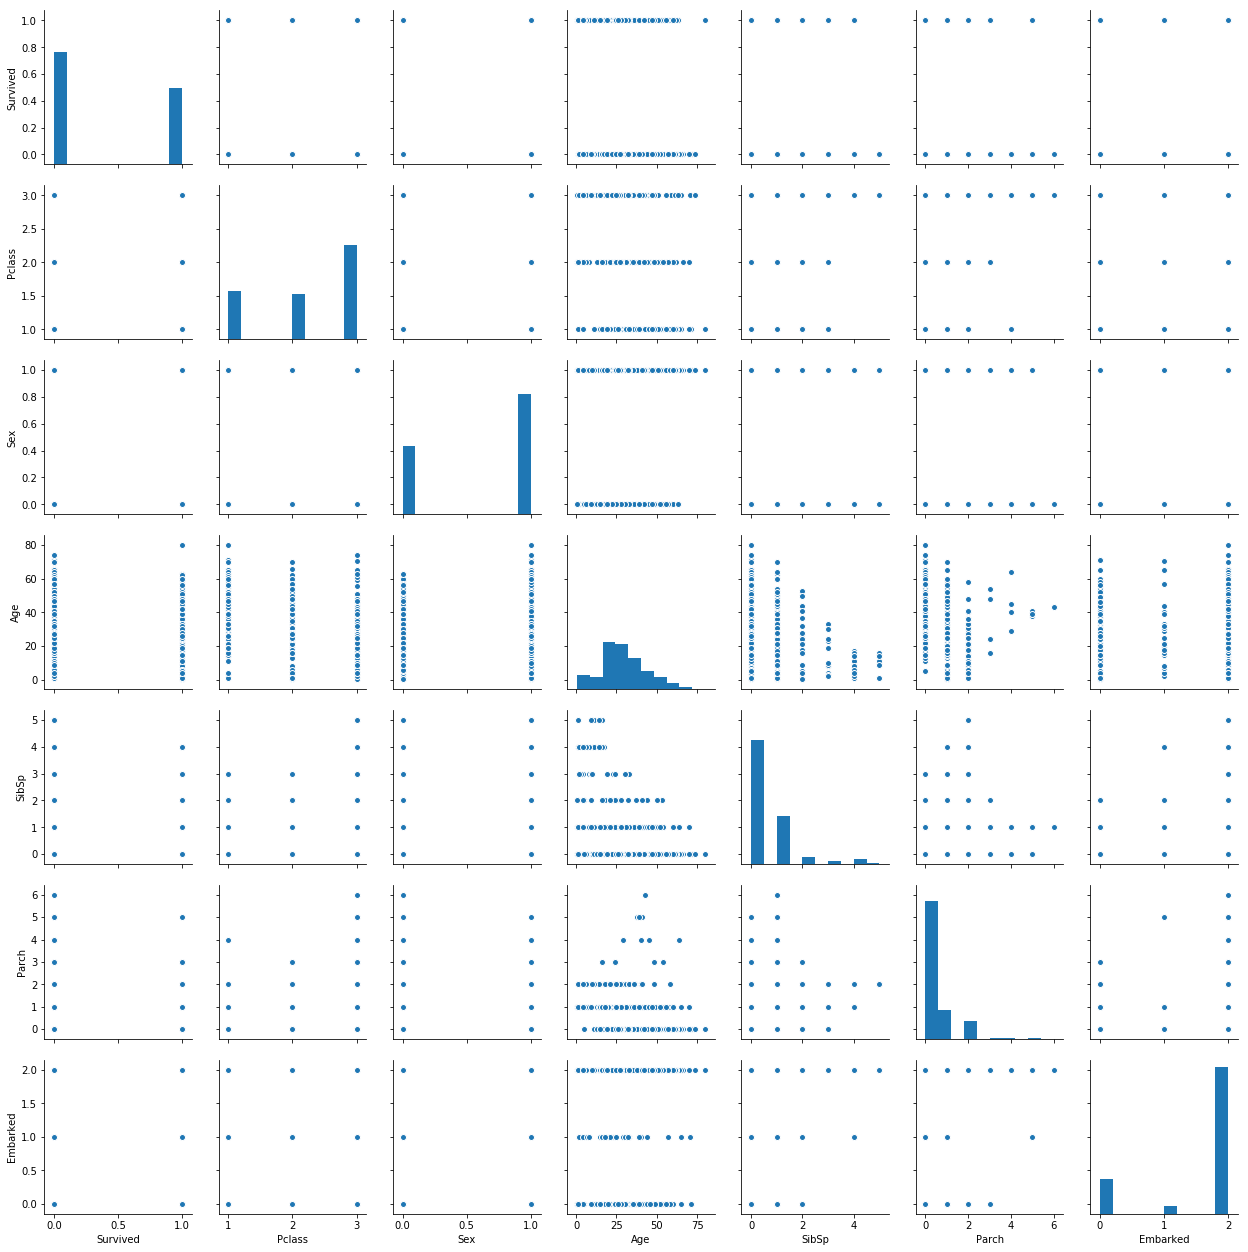

In [2]:
from Prep import titanic, OutTitanic
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


titanic.head()

df=  titanic.drop(['Fare', 'Surname', 'Title'], axis = 1)

sns.pairplot(df)

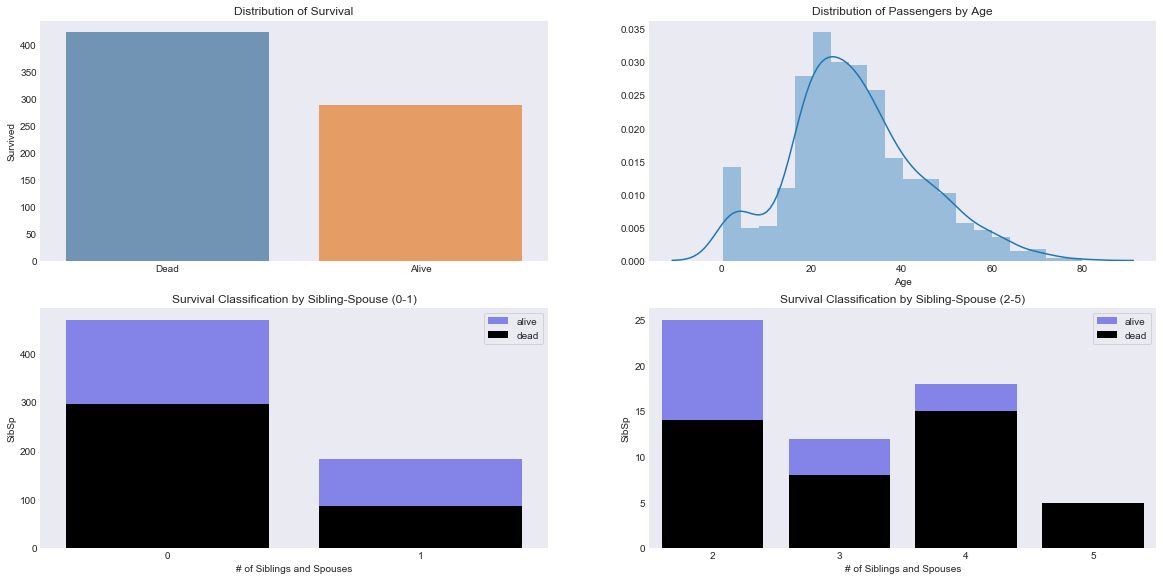

In [3]:
dead_subframe = df[df.Survived == 0]

fig = plt.figure(figsize = (20, 15))
sns.set_style('dark')

ax1 = plt.subplot2grid((3,2),(0,0))
sns.barplot(x = df.Survived.value_counts().index, y = df.Survived.value_counts(), alpha = 0.67, color ='pink')
plt.title('Distribution of Survival')


sns.barplot(x = df.Survived.value_counts().index, y = df.Survived.value_counts(), alpha = 0.67)
plt.title('Distribution of Survival')
ax1.set_xticklabels(['Dead', 'Alive'], fontsize=10)


ax2 = plt.subplot2grid((3,2),(0,1))
sns.distplot(df.Age, )
plt.title('Distribution of Passengers by Age')

ax3 = plt.subplot2grid((3,2), (1,0))
sns.barplot(x = df.SibSp.value_counts().iloc[:2].index, y = df.SibSp.value_counts().iloc[:2], label = 'alive', color = 'blue', alpha = 0.5 )
    
sns.barplot(x = dead_subframe.SibSp.value_counts().iloc[:2].index, y = dead_subframe.SibSp.value_counts().iloc[:2],label = 'dead', color = 'black')
plt.title('Survival Classification by Sibling-Spouse (0-1)')
ax3.legend( loc="best", frameon=True)
plt.xlabel('# of Siblings and Spouses')



ax4 = plt.subplot2grid((3,2), (1,1))
sns.barplot(x = df.SibSp.value_counts().iloc[2:].index, y = df.SibSp.value_counts().iloc[2:], label = 'alive', color = 'blue', alpha = 0.5 )
    
sns.barplot(x = dead_subframe.SibSp.value_counts().iloc[2:].index, y = dead_subframe.SibSp.value_counts().iloc[2:],label = 'dead', color = 'black')
plt.title('Survival Classification by Sibling-Spouse (2-5)')
ax4.legend( loc="best", frameon=True)
plt.xlabel('# of Siblings and Spouses')


plt.show()

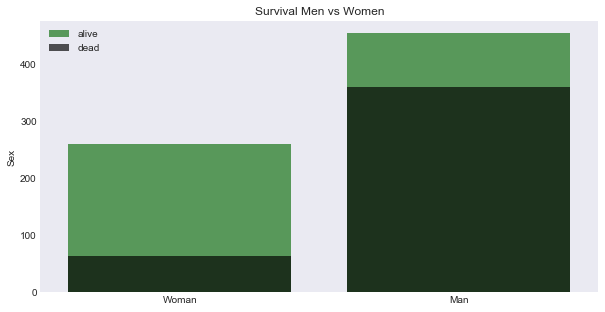

In [4]:
fig = plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.barplot(x = df.Sex.value_counts().index, y = df.Sex.value_counts(), alpha = 0.67,label = 'alive', color = 'green' )
plt.title('Distribution of Survival')


sns.barplot(x = dead_subframe.Sex.value_counts().index, y = dead_subframe.Sex.value_counts(), alpha = 0.67, label = 'dead',color = 'black')
plt.title('Survival Men vs Women')
ax.set_xticklabels(['Woman', 'Man'], fontsize=10)
ax.legend(loc = 'best')
plt.show()

# Feature Selection 

### Recursive Feature Elimination

Optimal number of Features (Logistic Regression): 
Features Selected:  ['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Embarked']


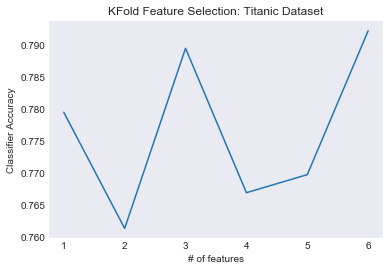

Optimal number of Features (Random Forest Regression): 
Features Selected:  ['Pclass' 'Sex' 'Age']


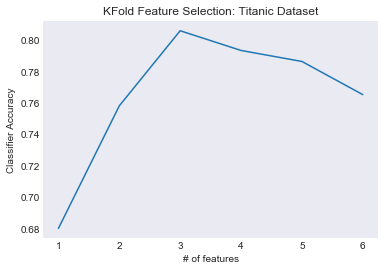

In [18]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

X, y = df.iloc[:,1:], df.iloc[:,0]
feat_labels = df.columns[1:]

logr = LogisticRegressionCV( )

r = RFECV(logr, cv = StratifiedKFold(5), scoring = 'accuracy')
r.fit(X, y)


print('Optimal number of Features (Logistic Regression): ')
print('Features Selected: ', feat_labels[r.support_].values)

plt.figure()
plt.plot(range(1, len(r.grid_scores_)+1), r.grid_scores_)
plt.xlabel('# of features')
plt.ylabel('Classifier Accuracy')
plt.title('KFold Feature Selection: Titanic Dataset')
plt.show()



rf = RandomForestClassifier()

r = RFECV(rf, cv = StratifiedKFold(5), scoring = 'accuracy')
r.fit(X, y)


print('Optimal number of Features (Random Forest Regression): ')
print('Features Selected: ', feat_labels[r.support_].values)

plt.figure()
plt.plot(range(1, len(r.grid_scores_)+1), r.grid_scores_)
plt.xlabel('# of features')
plt.ylabel('Classifier Accuracy')
plt.title('KFold Feature Selection: Titanic Dataset')
plt.show()

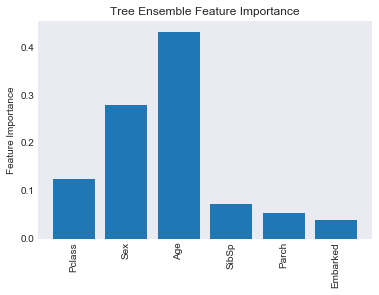

In [20]:
import numpy as np

t = RandomForestClassifier()
t.fit(X, y)
plt.figure()
plt.bar(range(len(feat_labels)), t.feature_importances_)
plt.xticks(range(len(feat_labels)), feat_labels, rotation =90)
plt.ylabel('Feature Importance')
plt.title('Tree Ensemble Feature Importance')
plt.show()